# 医用機械学習入門の手引き


## 0.Google colaboratoryの設定
実習にあたってまず下記の設定をして　GPUを使えるようにします。

0-1.画面左上のメニューバーからランタイムを選択してください。

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=19uyNdEhnz3MFkhcTgpmCKAp3xGOZUlEh' width=50%>
</left>
</figure>

0-2.開いたドロップダウンメニューから、「ランタイムのタイプを変更」をクリックしてください。

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1GCZ-fTrIgFCHhyJFtulGinPiCsXHsYMK' width=50%>
</left>
</figure>



0-3.「ノートブックの設定」というウィンドウが開くので、ハードウェアアクセラレータが「GPU」になっていることを確認して右下の「保存」を押してください。「GPU」に設定されていない場合はハードウェアアクセラレータに「GPU」を選択して、右下の「保存」を押してください。
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1BVRwK1TUiZdcS8ptpDCrbl14BMvpXbOL' width=50%>
</left>
</figure>

0-4.ノートブック画面右上の「接続」をクリックしてください。
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=17lgUS5Lfl0F3PEtTV1b79qpI1O_AVF0o' width=50%>
</left>
</figure>


0-5.ノートブック画面右上の「接続」の表示が変わり、緑色のチェックが表示され、RAMとディスクという表示になったことを確認してください。
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1eEOOY6JgAG15A2XRn0irijrHlFtSwmH-' width=50%>
</left>
</figure>


0-6.ノートブック画面右上の、今表示が変わったRAMとディスクという表示の上にカーソルを合わせると、「接続先 Python 3 Google Compute Engine バックエンド (GPU)」という表示が出ることを確認してください。
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1_mWrsnpRcUpfCUcA_E1DGvm7YIgx5hGS' width=50%>
</left>
</figure>


<font color="#ff4500"><b>注意！！！！</b></font>
しばらくGPUを使用しない状態が続くと、下記のような警告がGoogle colaboratoryの画面の左下に表示されますが、表示された時は「×」を押して消してください。<font color="#ff4500"><b>絶対に「標準ランタイムに切り替える」をクリックしないでください。</b></font>(もし間違えて押してしまった場合には、出てきたウィンドウで「GPUランタイムを継続する」を押して戻ってください。「標準ランタイムに変更する」を選択してしまうと、実行したスクリプトも全て最初からやり直しになりますので、0-1のランタイムの接続からやり直してください。)
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=17kmRjBgA4tYhPZls5krRT3l8RF5yb1Rl' width=50%>
</left>
</figure>

ここからは実習のスクリプトを実行していきます。まず、mnist datasetという手書きの数字画像のデータを使って、kerasとtensorflowを使った畳み込みニューラルネットワークで分類を行います。その次にNIHの胸部レントゲン画像セットを使って同様の手法で分類を行います。

## 1.必要なモジュールのimport

データ前処理及びニューラルネットワークの学習のために必要な各種モジュールをインポートします。


In [1]:
import pandas as pd
import numpy as np
import scipy.misc
import scipy
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.isotonic import IsotonicRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model, model_from_json, Sequential
from tensorflow.keras.layers import Dense, Reshape, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns

%matplotlib inline

#実習用に下記でランダムシードを固定する。
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

## 2.MNISTデータの読み込み
まずmnist dataセットを使って畳み込みニューラルネットワークで分類をしてみます。mnist.load_data()は60,000枚の28x28ピクセルの白黒画像データとその正解の数字，10,000枚のテスト用画像データとその正解の数字を読みこむ関数です。 下記のように実行してデータを読みこみます。

In [2]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


読み込んだデータはnumpyのndarray形式になっています。shapeを使ってデータの次元数と各次元のサイズを確認します。

In [3]:
print('X_train_mnistの各次元のサイズ: ', X_train_mnist.shape)
print('y_train_mnistの各次元のサイズ: ', y_train_mnist.shape)
print('X_test_mnistの各次元のサイズ: ', X_test_mnist.shape)
print('y_test_mnistの各次元のサイズ: ', y_test_mnist.shape)

X_train_mnistの各次元のサイズ:  (60000, 28, 28)
y_train_mnistの各次元のサイズ:  (60000,)
X_test_mnistの各次元のサイズ:  (10000, 28, 28)
y_test_mnistの各次元のサイズ:  (10000,)


sklearnのtrain_test_splitを用いてチューニング用データ(`X_tuning_mnist`、`y_tuning_mnist`)を学習用データ(`X_train_mnist`、`y_train_mnist`)から切り分けます。(Holdout mothodです)

In [4]:
X_train_mnist, X_tuning_mnist, y_train_mnist, y_tuning_mnist = train_test_split(X_train_mnist, y_train_mnist, test_size=0.2, random_state=0)

チューニング用データを切り分けた後に同様にデータの次元数を確認します。(ndarrayのデータの変形をした場合には必ずshapeで処理後の次元数が合っているかを確認します。)

In [5]:
print('X_train_mnistの各次元のサイズ: ', X_train_mnist.shape)
print('y_train_mnistの各次元のサイズ: ', y_train_mnist.shape)
print('X_tuning_mnistの各次元のサイズ: ', X_tuning_mnist.shape)
print('y_tuning_mnistの各次元のサイズ: ', y_tuning_mnist.shape)
print('X_test_mnistの各次元のサイズ: ', X_test_mnist.shape)
print('y_test_mnistの各次元のサイズ: ', y_test_mnist.shape)

X_train_mnistの各次元のサイズ:  (48000, 28, 28)
y_train_mnistの各次元のサイズ:  (48000,)
X_tuning_mnistの各次元のサイズ:  (12000, 28, 28)
y_tuning_mnistの各次元のサイズ:  (12000,)
X_test_mnistの各次元のサイズ:  (10000, 28, 28)
y_test_mnistの各次元のサイズ:  (10000,)


## 3.読み込んだデータの確認
読み込んだMNISTのデータのうち、X_trainの最初の20枚の画像を下記のプログラムで描出してます。0〜9までの手書き文字のデータであることが確かに確認できます。

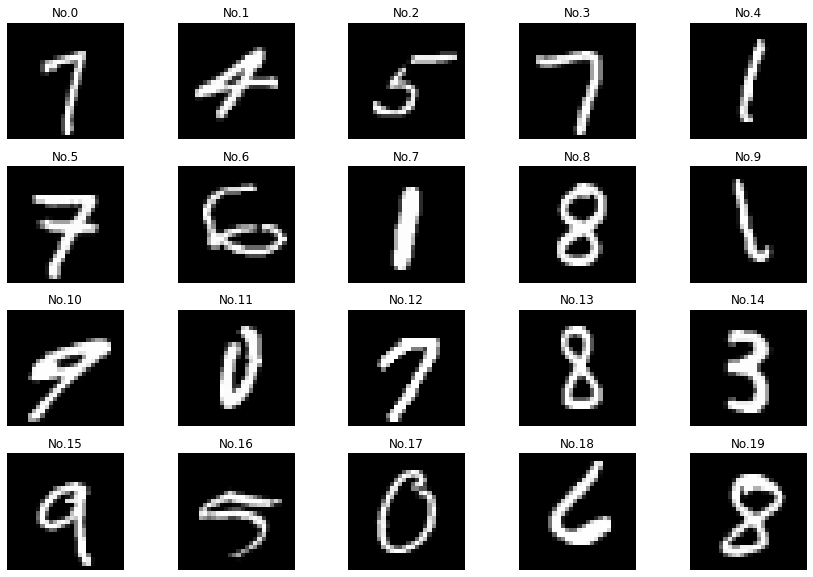

In [6]:
fig = plt.figure(figsize=(12, 40))

for i in range(20):
    plt.subplot(20, 5, i+1)
    plt.imshow((X_train_mnist[i]).astype(np.int32).reshape(28, 28), cmap='gray')
    plt.title("No.{0}".format(i))
    plt.axis("off")
    
plt.tight_layout()

## 4.読み込んだデータを畳み込みニューラルネットワークで学習するための形に変形する

畳み込みニューラルネットワーク(CNN, Convolutional Neural Network)では、データの2次元構造を保持したままニューラルネットワークにデータを入力します。そのため、読み込んだmnist datasetを適した形に変形する必要があります。

numpyのndarrayはreshapeメソッドで形を変形できます。`X_train_mnist`は、例えば48000枚の28x28ピクセルの画像データを保持していて、現在その各次元のサイズは(48000,28, 28)でこれが28x28の配列が48000セットある状態を示します。
    
畳み込みニューラルネットワークに入れるに当たって、reshapeメソッドを用いて次元数と各次元のサイズを(枚数、28, 28, チャンネル数)の形にする必要があります。（チャンネル数は白黒画像であれば1、カラー画像であれば3となります。今回は白黒画像なのでチャンネル数=1です。）

shapeは各次元のサイズをタプルデータ型で返します。`X_train_mnist.shape[0]`は今回のケースでは画像の枚数を示します。`X_train_mnist.shape = (48000, 28, 28)`であり、`X_train_mnist.shape[0] = 48000`、`X_train_mnist.shape[1] = 28`、`X_train_mnist.shape[2] = 28`となります。
     
Tensorflowは32ビット浮動小数点の数字を受け入れるため、.astype('float32')で32ビット浮動小数点の数字にします。
     
X_train、X_testに含まれる数字はピクセル値であり、0-255の整数ですが、計算の便宜上-1から1の間に圧縮します。 
     
y_train、y_testは0-9の整数の羅列ですが、ニューラルネットワークの出力と比較するため、to_categofical関数で10分類のone-hot表現に変形します。one-hot表現では、例えば4という数字は`[0,0,0,0,1,0,0,0,0,0]`という表現に置き換わります。

下記を実行してデータの次元と各次元のサイズを変更します。

In [7]:
#X_train_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0],28,28,1).astype('float32')
X_train_mnist = ((X_train_mnist/255.)-0.5)*2.

#y_train_mnistをone-hot表現に変換してy_train_mnist_ohという変数に入れておく
y_train_mnist_oh = to_categorical(y_train_mnist)

#X_tuning_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_tuning_mnist = X_tuning_mnist.reshape(X_tuning_mnist.shape[0],28,28,1).astype('float32')
X_tuning_mnist = ((X_tuning_mnist/255.)-0.5)*2.

#y_tuning_mnistをone-hot表現に変換してy_tuning_mnist_ohという変数に入れておく
y_tuning_mnist_oh = to_categorical(y_tuning_mnist)

#X_test_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0],28,28,1).astype('float32')
X_test_mnist = ((X_test_mnist/255.)-0.5)*2.

#y_test_mnistをone-hot表現に変換してy_test_mnist_ohという変数に入れておく
y_test_mnist_oh = to_categorical(y_test_mnist)

データを整形した後には必ず.shapeで次元数と各次元のサイズを確認します。

In [8]:
print('X_train_mnistの各次元のサイズ: ', X_train_mnist.shape)
print('y_train_mnistの各次元のサイズ: ', y_train_mnist.shape)
print('y_train_mnist_ohの各次元のサイズ: ', y_train_mnist_oh.shape)
print()
print('X_tuning_mnistの各次元のサイズ: ', X_tuning_mnist.shape)
print('y_tuning_mnistの各次元のサイズ: ', y_tuning_mnist.shape)
print('y_tuning_mnist_ohの各次元のサイズ: ', y_tuning_mnist_oh.shape)
print()
print('X_test_mnistの各次元のサイズ: ', X_test_mnist.shape)
print('y_test_mnistの各次元のサイズ: ', y_test_mnist.shape)
print('y_test_mnist_ohの各次元のサイズ: ', y_test_mnist_oh.shape)

X_train_mnistの各次元のサイズ:  (48000, 28, 28, 1)
y_train_mnistの各次元のサイズ:  (48000,)
y_train_mnist_ohの各次元のサイズ:  (48000, 10)

X_tuning_mnistの各次元のサイズ:  (12000, 28, 28, 1)
y_tuning_mnistの各次元のサイズ:  (12000,)
y_tuning_mnist_ohの各次元のサイズ:  (12000, 10)

X_test_mnistの各次元のサイズ:  (10000, 28, 28, 1)
y_test_mnistの各次元のサイズ:  (10000,)
y_test_mnist_ohの各次元のサイズ:  (10000, 10)


## 5.Kerasを用いてニューラルネットを組む
    
Kerasを用いて畳み込みニューラルネットワークを組んでいきます。  

In [9]:
mnist_model = Sequential()
mnist_model.add(Reshape((784,), input_shape=(28, 28, 1)))
mnist_model.add(Dense(units=200, activation="relu"))
mnist_model.add(Dense(units=200, activation="relu"))
mnist_model.add(Dense(units=10, activation="softmax"))

kerasのモデルはsummaryメソッドで構造を表形式で表示できます。

In [10]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


## 6.作成したニューラルネットをどのように学習させるかを設定する

上のプログラムで作成したニューラルネットを、どのように学習させるか設定します。

具体的には.compile()で損失関数(loss)、最適化アルゴリズム(optimizer)、評価関数(metrics)を与えてニューラルネットを完成させます。

一般的には分類問題であればlossはcategorical_crossentropy(2分類であればbinary_crossentropy)を用いる。

oprimizerは下記では確率的勾配降下法（SGD, Stochastic Gradient Descent）を用いており、lrはlearning rateを示します。learning rateが大きいほど、一回の学習でのパラメータの更新は大きくなります。

分類問題であるため、評価関数はとりあえずaccuracyを用いることにします。


In [11]:
mnist_model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])

## 7.学習を行う
kerasのモデルはfitメソッドを用いて学習を行うことができます。学習データ、正解データ、エポック数、バッチサイズを与えて学習を開始します。ここではとりあえずエポック数は10とします。

In [12]:
mnist_model.fit(X_train_mnist, 
                y_train_mnist_oh, 
                epochs=10, 
                validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                batch_size=128, 
                shuffle=True)

Epoch 1/10
375/375 [==============================] - 5s 5ms/step - loss: 0.7899 - accuracy: 0.7858 - val_loss: 0.4221 - val_accuracy: 0.8824
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3814 - accuracy: 0.8907 - val_loss: 0.3368 - val_accuracy: 0.8994
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.9062 - val_loss: 0.2942 - val_accuracy: 0.9142
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2934 - accuracy: 0.9148 - val_loss: 0.2731 - val_accuracy: 0.9183
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2700 - accuracy: 0.9217 - val_loss: 0.2577 - val_accuracy: 0.9258
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2531 - accuracy: 0.9267 - val_loss: 0.2334 - val_accuracy: 0.9333
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2372 - accuracy: 0.9317 - val_loss: 0.2213 - val_accuracy: 0.9382
Epoch 

## 8.テストデータを用いて学習結果を検証する
あらかじめとっておいたテスト用データ(`X_test_mnist`、`y_test_mnist`)を用いて、今学習させたニューラルネットワークの正確性を検証します。（本来であればハイパーパラメータを調整してベストのハイパーパラメータを決めて、`X_train_mnist`と`X_tuning_mnist`を合わせたデータでモデルを学習させて、最後にテスト用データで検証します）
モデルのpredictメソッドにテスト用データを与え、予測結果を出力することができます。
    
y_pred_mnist（モデルによる予測）とy_test_mnist（正解データ）から評価指標を算出します。

In [13]:
y_pred_mnist = mnist_model.predict(X_test_mnist, batch_size=128)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist, average='macro'))

accuracy: 0.9424
f1 score: 0.9416356733784876


画像を実際に1枚選んで予測させてみましょう。画像のndarrayを入力すると、画像を表示する関数show_imgを作って画像を表示してみます。

In [14]:
def show_img(img_arr):
    plt.imshow((((img_arr)/2 + 0.5)*255).astype(np.int32).reshape(28, 28), cmap='gray')

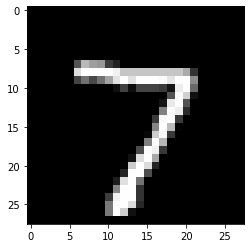

In [15]:
show_img(X_test_mnist[0])

この画像をpredictメソッドで作ったモデルで予測させた結果を見てみます。

In [16]:
np.argmax(mnist_model.predict(X_test_mnist[0].reshape(1, 28, 28, 1)))

7

## 9.畳み込みニューラルネットワークを使ってみる

畳み込みニューラルネットワークでは、一定の大きさのフィルター(重みの集まり)を少しずつずらしながら画像に当てていき、計算を進めていきます。

畳み込みの計算では、下記のようにフィルターを当てたときのそれぞれの数値の積の合計を計算して出力しています。フィルター部分が、学習で調整する畳み込みニューラルネットワークのパラメータになります。

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1G8tbbn5Tvxye8SVY1GrLH81WBOQBJY0-' width=50%>
</left>
</figure>

Max-poolingの計算では、下記のように決められたサイズの中の最大値を出力しています。MAX poolingの計算にはパラメータはありません。

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1K-OQfyJt4-BdaSDrSZs5qQaZnmviCWg2' width=35%>
</left>
</figure>

実際に作成した下記のニューラルネットワークでは、最初の畳み込み層(Conv2D)は28x28ピクセルの画像に3x3ピクセルのフィルターをずらしながら当てていくことで26x26ピクセルのデータが出力されます。ここの畳み込み層では16種類のフィルターを準備して、26x26ピクセルのデータを16枚出力するようになっています。

MaxPooling2Dでは定められた範囲内のうち最大のピクセルのみを選んで残します。下記のConv2Dの次のMaxPooling2Dでは26x26ピクセルのデータが13x13ピクセルのデータに縮小されることになります。その結果出力されるのは13x13ピクセルのデータが16枚ということになります。

次の畳み込み層では再び1種類あたり3x3ピクセルx16枚のフィルターを当てていき、13x13ピクセルのデータは11x11ピクセルとなります。ここの畳み込み層では32種類のフィルターを当てるため、11x11ピクセルのデータを32枚出力することになります。その次のMaxPooling2Dで5x5ピクセルのデータが32枚出力されます。

最後にflattenによって全ての数値を1次元に並べます。flattenによって5x5x32 = 800 個のunitが並んでいる状態となります。

その次のDense層で800個のunitは256個のunitへ伝達され、最終的に10個のunitへ入力されてsoftmax関数(合計で1になるようにする関数)で出力されます。


In [17]:
mnist_model_cnn = Sequential()
mnist_model_cnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mnist_model_cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
mnist_model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
mnist_model_cnn.add(Flatten())

mnist_model_cnn.add(Dense(units=256, activation='relu'))
mnist_model_cnn.add(Dense(units=10, activation='softmax'))

上記のモデルは図示化すると下のようになります。
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1FLBlSgoOdA4DgQWB5rtt8Y6mLTMRtPna' width=100%>
</left>
</figure>

上述した詳しいニューラルネットワークの構造を表形式で出力してみます。

In [18]:
mnist_model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

先ほどと同様に、上のプログラムで作成した畳み込みニューラルネットを、どのように学習させるか設定します。

In [19]:
mnist_model_cnn.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


先ほどと同じくfitメソッドを用いて学習データ、正解データ、エポック数、バッチサイズを与えて学習を開始します。エポック数はここでもいったん10としておきます。

In [20]:
mnist_model_cnn.fit(X_train_mnist, 
                    y_train_mnist_oh, 
                    epochs=10, 
                    validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                    batch_size=128, 
                    shuffle=True)

Epoch 1/10
375/375 [==============================] - 32s 9ms/step - loss: 1.1114 - accuracy: 0.7279 - val_loss: 0.3402 - val_accuracy: 0.9087
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2715 - accuracy: 0.9233 - val_loss: 0.2037 - val_accuracy: 0.9443
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1887 - accuracy: 0.9458 - val_loss: 0.1514 - val_accuracy: 0.9572
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1502 - accuracy: 0.9563 - val_loss: 0.1248 - val_accuracy: 0.9645
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1263 - accuracy: 0.9634 - val_loss: 0.1140 - val_accuracy: 0.9666
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1116 - accuracy: 0.9677 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0997 - accuracy: 0.9704 - val_loss: 0.0914 - val_accuracy: 0.9739
Epoch

y_pred_mnist_cnn（畳み込みニューラルネットワークモデルによる予測）とy_test_mnist（正解データ）から評価指標を算出します。

In [21]:
y_pred_mnist_cnn = mnist_model_cnn.predict(X_test_mnist, batch_size=128)
y_pred_mnist_cnn = np.argmax(y_pred_mnist_cnn, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist_cnn))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist_cnn, average='macro'))

accuracy: 0.9766
f1 score: 0.9764900143043198


## 10.NIH Chest X-ray Dataset 
30,805人の患者の112,120枚の正面視X線画像からなるデータセットで、Atelectasis, Consolidation, Infiltration, Pneumothorax, Edema, Emphysema, Fibrosis, Effusion, Pneumonia, Pleural_thickening, Cardiomegaly, Nodule, Mass, Herniaの14のラベルが読影レポートからのテキストマイニングで付けられています。
このデータセットは、NIH クリニカル センターから提供されており、NIH のサイト（ https://nihcc.app.box.com/v/ChestXray-NIHCC ）から入手できるようになっています。

Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017

まず事前にこちらで作成した画像データとラベルデータのzipファイルをダウンロードします。元は1024x1024ピクセルの画像データですが、今回は実習用に64x64ピクセルに解像度を落としてあります。また、ラベルに関する情報はcsvファイルに記載してあります。

今回は、異常所見のラベルが何もついていない画像であれば 0 、何かしら異常を示すラベルがついていれば 1 というラベルを用いて、畳み込みニューラルネットワークを使って分類を学習してみることにします。

In [22]:
FILE_ID = "1uW9eivQ9MtFvHVirC3YTByxhV5W8CqKT"
FILE_NAME = "medrwd_ml.zip"
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-10-03 23:39:40--  https://docs.google.com/uc?export=download&confirm=b6BG&id=1uW9eivQ9MtFvHVirC3YTByxhV5W8CqKT
Resolving docs.google.com (docs.google.com)... 142.250.136.139, 142.250.136.101, 142.250.136.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-04-docs.googleusercontent.com/docs/securesc/m2hvls6o85tbopa56k7qsrtop630pmq9/64v73lkc8rqrbarbe07kpcaq5rkkhsg8/1633304325000/11719972121339779033/01294633123356322339Z/1uW9eivQ9MtFvHVirC3YTByxhV5W8CqKT?e=download [following]
--2021-10-03 23:39:40--  https://doc-00-04-docs.googleusercontent.com/docs/securesc/m2hvls6o85tbopa56k7qsrtop630pmq9/64v73lkc8rqrbarbe07kpcaq5rkkhsg8/1633304325000/11719972121339779033/01294633123356322339Z/1uW9eivQ9MtFvHVirC3YTByxhV5W8CqKT?e=download
Resolving doc-00-04-docs.googleusercontent.com (doc-00-04-docs.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Conne

ダウンロードしたzipファイルを解凍します。

In [23]:
! unzip medrwd_ml.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: train_img_64/00020001_000.png  
 extracting: train_img_64/00020002_000.png  
 extracting: train_img_64/00020003_000.png  
 extracting: train_img_64/00020004_000.png  
 extracting: train_img_64/00020005_000.png  
 extracting: train_img_64/00020006_000.png  
 extracting: train_img_64/00020007_000.png  
 extracting: train_img_64/00020008_002.png  
 extracting: train_img_64/00020009_000.png  
 extracting: train_img_64/00020010_000.png  
 extracting: train_img_64/00020011_000.png  
 extracting: train_img_64/00020012_000.png  
 extracting: train_img_64/00020013_000.png  
 extracting: train_img_64/00020014_000.png  
 extracting: train_img_64/00020015_000.png  
 extracting: train_img_64/00020016_000.png  
 extracting: train_img_64/00020017_000.png  
 extracting: train_img_64/00020018_000.png  
 extracting: train_img_64/00020019_000.png  
 extracting: train_img_64/00020020_005.png  
 extracting: train_img_64/00020021_000.png  
 extracting: train_img_

学習用のデータの情報、テスト用のデータの情報が記載されたCSVファイルをpandasのread_csv関数で読みこみます。

In [24]:
df_train = pd.read_csv("img_labels_train.csv")
df_test = pd.read_csv("img_labels_test.csv")

読み込んだCSVファイルの中身を確認してみます。一番右側のlabelというカラムはこちらで追加したカラムで、異常所見のラベルが何もついていない画像であれば 0 、何かしら異常を示すラベルがついていれば 1 となっています。

In [25]:
df_train

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,1
1,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,0
2,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,1
3,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,1
4,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,00024996_000.png,No Finding,0,24996,22,F,PA,2750,2991,0.143,0.143,0
24996,00024997_000.png,Infiltration,0,24997,29,F,PA,2544,3056,0.139,0.139,1
24997,00024998_000.png,Infiltration,0,24998,22,F,PA,2544,3056,0.139,0.139,1
24998,00024999_000.png,No Finding,0,24999,22,F,PA,2544,3056,0.139,0.139,0


In [26]:
df_test

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
0,00025001_000.png,No Finding,0,25001,30,F,PA,2544,3056,0.139,0.139,0
1,00025002_000.png,No Finding,0,25002,44,M,PA,3056,2544,0.139,0.139,0
2,00025003_000.png,No Finding,0,25003,24,F,PA,2544,3056,0.139,0.139,0
3,00025004_000.png,Infiltration,0,25004,22,M,PA,2544,3056,0.139,0.139,1
4,00025005_000.png,Cardiomegaly,0,25005,53,F,PA,3012,2476,0.139,0.139,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5800,00030801_000.png,No Finding,0,30801,38,M,PA,2500,2048,0.168,0.168,0
5801,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168,0
5802,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,0
5803,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168,0


学習用データの最初の20枚について画像データを表示してみます。

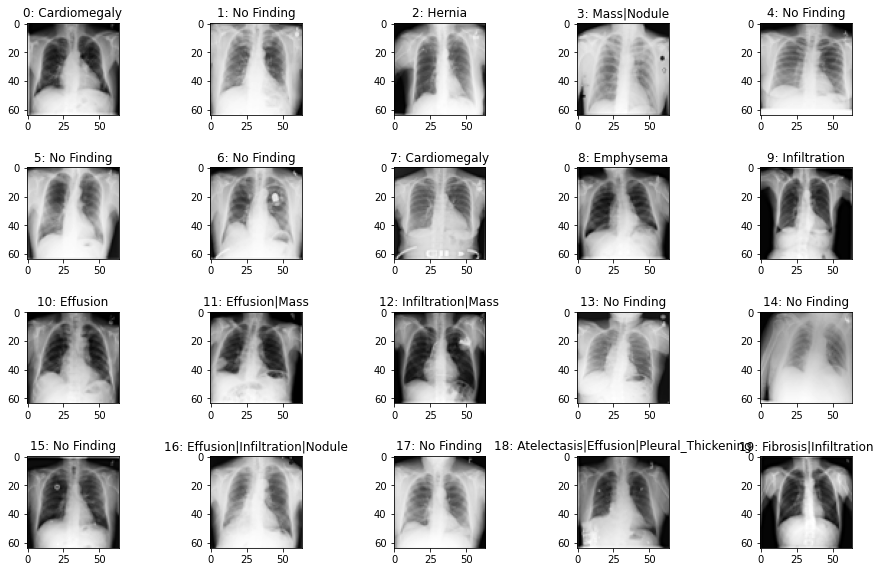

In [27]:
fig = plt.figure(figsize=(12, 40))

for i in range(20):
    plt.subplot(20, 5, i+1)
    img = imageio.imread(os.path.join('train_img_64', df_train.loc[i, 'Image Index']))
    plt.imshow(img)
    plt.gray()
    plt.title(str(i) + ': ' + df_train.loc[i, 'Finding Labels'])
plt.tight_layout()

下記を実行して学習用の画像が入っているtrain_img_64ディレクトリから、画像をnumpyのndarray形式で全て読みこみ、img_array_trainの変数に入れます。下記では読み込み用にread_imgという関数を作り、画像読み込み時に画像データをニューラルネットワークのための(枚数、64、64、チャンネル数)の形に変換しています。

In [28]:
def read_img(path, img_name):
    img = imageio.imread(os.path.join(path, img_name))
    img = Image.fromarray(img).resize((64, 64))
    img = img.convert('L')
    img = np.array(img).reshape(1, 64, 64, 1)

    return img

img_list = []

for i in df_train['Image Index']:
    img = read_img('train_img_64', i)
    img_list.append(img)

img_array_train = np.concatenate(img_list, axis=0)

読み込んだndarrayの次元数と各次元のサイズを確認します。

In [29]:
print(img_array_train.shape)

(25000, 64, 64, 1)


読み込んだCSVファイルの"label"カラム（No Findingであれば 0 、何かしら異常があれば 1 ）をlabels_trainという名前の変数に入れておきます。

In [30]:
labels_train = df_train['label']

読み込んだラベルデータの次元数と各次元のサイズを確認します。

In [31]:
print(labels_train.shape)

(25000,)


読み込んだデータを、学習用データとチューニング用データに切り分けます。

In [32]:
X_train, X_tuning, y_train, y_tuning = train_test_split(img_array_train, labels_train, test_size=0.2, random_state=0)

データをニューラルネットワークに入れるための形式に修正します。

In [33]:
X_train = (((X_train/255.)-0.5)*2.).astype('float32')
X_tuning = (((X_tuning/255.)-0.5)*2.).astype('float32')
y_train_oh = to_categorical(y_train)
y_tuning_oh = to_categorical(y_tuning)

修正後のデータの次元数と各次元のサイズを確認する。

In [34]:
print('X_trainの各次元のサイズ: ', X_train.shape)
print('y_trainの各次元のサイズ: ', y_train.shape)
print('y_train_ohの各次元のサイズ: ', y_train_oh.shape)
print()
print('X_tuningの各次元のサイズ: ', X_tuning.shape)
print('y_tuningの各次元のサイズ: ', y_tuning.shape)
print('y_tuning_ohの各次元のサイズ: ', y_tuning_oh.shape)

X_trainの各次元のサイズ:  (20000, 64, 64, 1)
y_trainの各次元のサイズ:  (20000,)
y_train_ohの各次元のサイズ:  (20000, 2)

X_tuningの各次元のサイズ:  (5000, 64, 64, 1)
y_tuningの各次元のサイズ:  (5000,)
y_tuning_ohの各次元のサイズ:  (5000, 2)


テスト用のデータについても同様に読み込んで整形し、同様に次元数と各次元のサイズを確認しておきます。

In [35]:
img_list_test = []

for i in df_test['Image Index']:
    img = read_img('test_img_64', i)
    img_list_test.append(img)

X_test = np.concatenate(img_list_test, axis=0)
X_test = (((X_test/255.)-0.5)*2.).astype('float32')

y_test = df_test['label']
y_test_oh = to_categorical(y_test)

print('X_testの各次元のサイズ: ', X_test.shape)
print('y_testの各次元のサイズ: ', y_test.shape)
print('y_test_ohの各次元のサイズ: ', y_test_oh.shape)

X_testの各次元のサイズ:  (5805, 64, 64, 1)
y_testの各次元のサイズ:  (5805,)
y_test_ohの各次元のサイズ:  (5805, 2)


ここまででデータの準備が終わりました。ここからはkerasを使ってニューラルネットワークを組んで学習を行います。最初に下記のようなネットワークをとりあえず組んで試してみます。

In [36]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=2, activation='softmax', name="output"))

モデルを表形式で確認しておきます。

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 128)       1280      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

学習時の条件を設定してモデルをコンパイルします。lossは2分類なのでbinary_crossentropy、optimizerは今回はAdamとしてみます。

In [38]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

今回は下記を設定して、学習時に2エポック連続でlossが改善しなかったら学習を止めるように設定します。

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

学習開始前にランダムシードを再固定します。

In [40]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

学習を開始します。

In [41]:
history = model.fit(X_train, y_train_oh, 
                    epochs=10, 
                    validation_data=(X_tuning, y_tuning_oh), 
                    batch_size=128, 
                    shuffle=True, 
                    callbacks=[early_stop])

Epoch 1/10
157/157 [==============================] - 43s 244ms/step - loss: 0.6054 - accuracy: 0.7021 - val_loss: 0.5982 - val_accuracy: 0.7042
Epoch 2/10
157/157 [==============================] - 37s 237ms/step - loss: 0.5896 - accuracy: 0.7068 - val_loss: 0.5933 - val_accuracy: 0.7116
Epoch 3/10
157/157 [==============================] - 37s 237ms/step - loss: 0.5823 - accuracy: 0.7113 - val_loss: 0.5789 - val_accuracy: 0.7150
Epoch 4/10
157/157 [==============================] - 37s 238ms/step - loss: 0.5753 - accuracy: 0.7150 - val_loss: 0.5752 - val_accuracy: 0.7142
Epoch 5/10
157/157 [==============================] - 37s 237ms/step - loss: 0.5708 - accuracy: 0.7190 - val_loss: 0.5732 - val_accuracy: 0.7144
Epoch 6/10
157/157 [==============================] - 37s 237ms/step - loss: 0.5659 - accuracy: 0.7222 - val_loss: 0.5710 - val_accuracy: 0.7196
Epoch 7/10
157/157 [==============================] - 37s 237ms/step - loss: 0.5600 - accuracy: 0.7265 - val_loss: 0.5677 - val_ac

下記を実行して学習時のlossの推移を確認します。

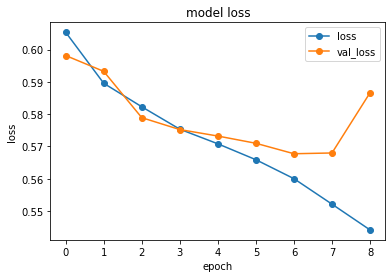

In [42]:
#Loss
plt.plot(history.history['loss'],"o-",label="loss",)
plt.plot(history.history['val_loss'],"o-",label="val_loss")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

学習時のaccuracyの推移を確認します。

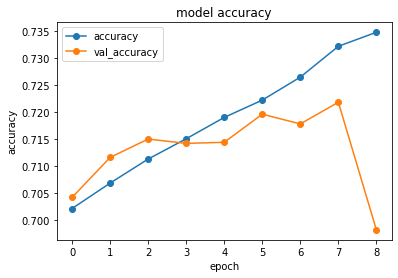

In [43]:
#Accuracy
plt.plot(history.history['accuracy'],"o-",label="accuracy",)
plt.plot(history.history['val_accuracy'],"o-",label="val_accuracy")
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

チューニングデータに対する予測を評価してみます。予測結果をpredictメソッドで取得します。

In [44]:
y_prob_oh = model.predict(X_tuning, batch_size=128)
y_pred = np.argmax(y_prob_oh, axis=1)
y_prob = y_prob_oh[:, 1]

sklearnにはspecifisityを算出する関数がなかったので自分で作ります。

In [45]:
def specificity_score(true, pred):
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    return tn / (tn + fp)

各種評価指標を算出してみます。

In [46]:
print('accuracy: ',accuracy_score(y_tuning, y_pred))    #accuracy: 正解率
print('precision: ',precision_score(y_tuning, y_pred))   #precision: 適合率（陽性的中率)
print('recall: ',recall_score(y_tuning, y_pred))         #recall: 再現率（感度）
print('specificity: ',specificity_score(y_tuning, y_pred))  #specificity: 特異度
print('f1 score: ',f1_score(y_tuning, y_pred))               #F1 score: 再現率と適合率の調和平均 2*Precision*Recall/(Precision + Recall)        

accuracy:  0.6982
precision:  0.4853683148335015
recall:  0.325
specificity:  0.8551136363636364
f1 score:  0.38931606636989075


下記を実行して混同行列を表示してみます。

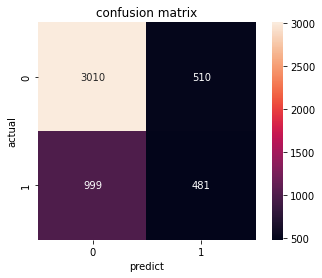

In [47]:
def plot_confusion_table(true, pred):
     sns.heatmap(confusion_matrix(true, pred), annot=True, fmt='g', square=True)
     plt.title('confusion matrix')
     plt.xlabel('predict')
     plt.ylabel('actual')
     plt.show()

plot_confusion_table(y_tuning, y_pred)

ROC曲線を描いてAUCを算出してみます。

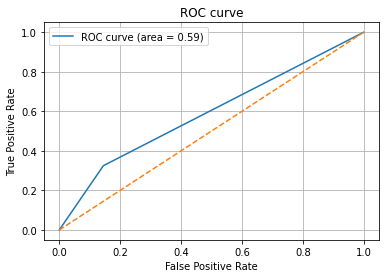

In [48]:
def plot_roc_curve_auc(true, pred):
    fpr, tpr, thresholds = metrics.roc_curve(true, pred)

    auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

plot_roc_curve_auc(y_tuning, y_pred)

caliblation plotを描いてcalibrationの状況を可視化してみます。

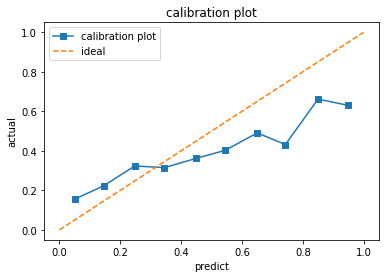

In [49]:
def plot_caliblation_curve(true, prob):
    prob_true, prob_pred = calibration_curve(true, prob, n_bins=10)
    plt.figure()
    plt.plot(prob_pred, prob_true, marker='s', label='calibration plot') 
    plt.plot([0, 1], [0, 1], linestyle='--', label='ideal') 
    plt.legend(loc='upper left')
    plt.title('calibration plot')
    plt.xlabel('predict')
    plt.ylabel('actual')
    plt.show()

plot_caliblation_curve(y_tuning, y_prob)

Grad-CAMという手法を用いて、画像のどの部分が判断に効いているのかを可視化してみます。

まずtf-keras-visをインストールします。

In [50]:
!pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.3 MB/s 


Grad-CAMを描画する関数を下記で定義します。

In [73]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

def grad_cam(model, index, img_tensor, label_tensor):

    layer_id = 0
    output = [model.layers[layer_id].output]

    loss = lambda output: tf.keras.backend.mean(output[:, tf.argmax(label_tensor[index])])

    def model_modifier(m):
        m.layers[-1].activation = tf.keras.activations.linear
        return m

    gradcam = Gradcam(model, model_modifier, clone=False)
    cam = gradcam(loss, img_tensor[index])
    cam = normalize(cam)
    
    heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
    if img_tensor.shape[-1] == 1:
        plt.imshow(img_tensor[index].reshape((64, 64)))
    elif img_tensor.shape[-1] ==3:
        plt.imshow(img_tensor[index][:, :, 1].reshape((64, 64)))
    plt.imshow(heatmap, cmap='jet', alpha=0.5)

チューニング用データについてGrad Camを出力して描画した画像を20枚だけ出力してみます。

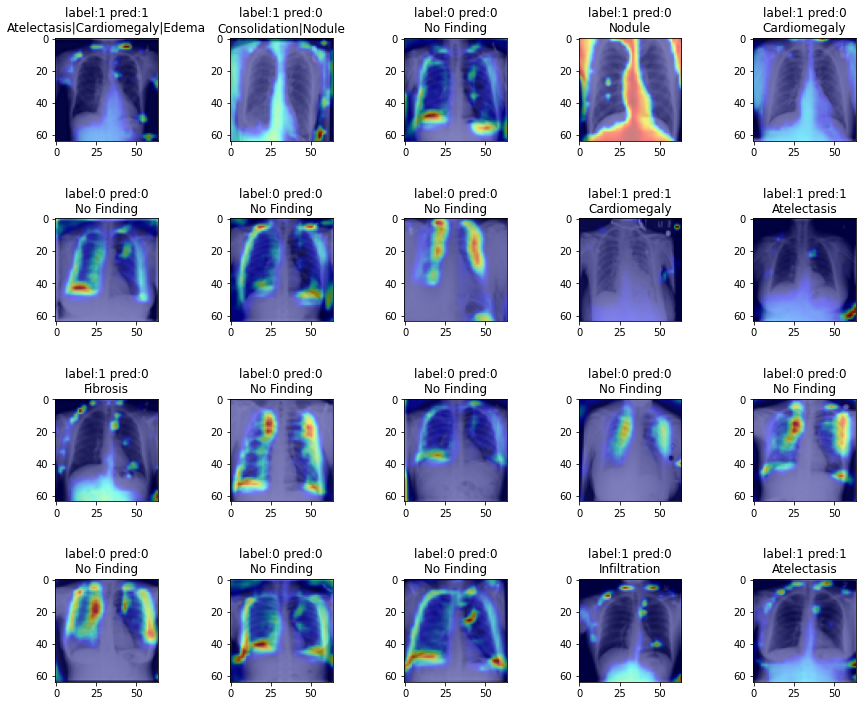

In [74]:
fig = plt.figure(figsize=(12, 50))

for i in range(20):
    plt.subplot(20, 5, i+1)
    grad_cam(model, i, X_tuning, y_tuning_oh)
    plt.title('label:' + str(y_tuning[y_tuning.index[i]]) + ' pred:' + str(y_pred[i]) + '\n' + df_train.loc[y_tuning.index[i], 'Finding Labels'])
plt.tight_layout()

上記のようにチューニング用データで評価指標が上がるようにハイパーパラメータを調節し、最終的にはテストデータに対して検証を行います。（本来であればハイパーパラメータを調整してベストのハイパーパラメータを決めて、`X_train`と`X_tuning`を合わせたデータでモデルを学習させて、最後にテスト用データで検証します）

accuracy:  0.6682170542635659
precision:  0.5378151260504201
recall:  0.28699551569506726
specificity:  0.8696682464454977
f1 score:  0.3742690058479532


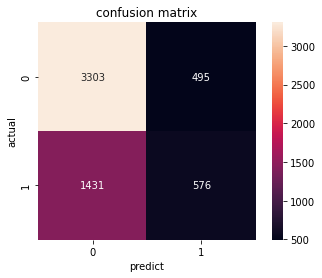

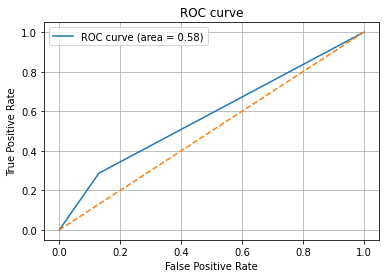

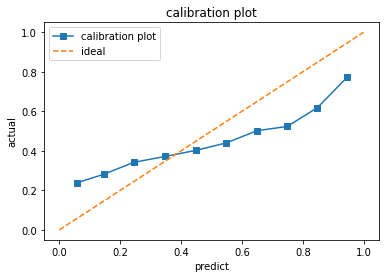

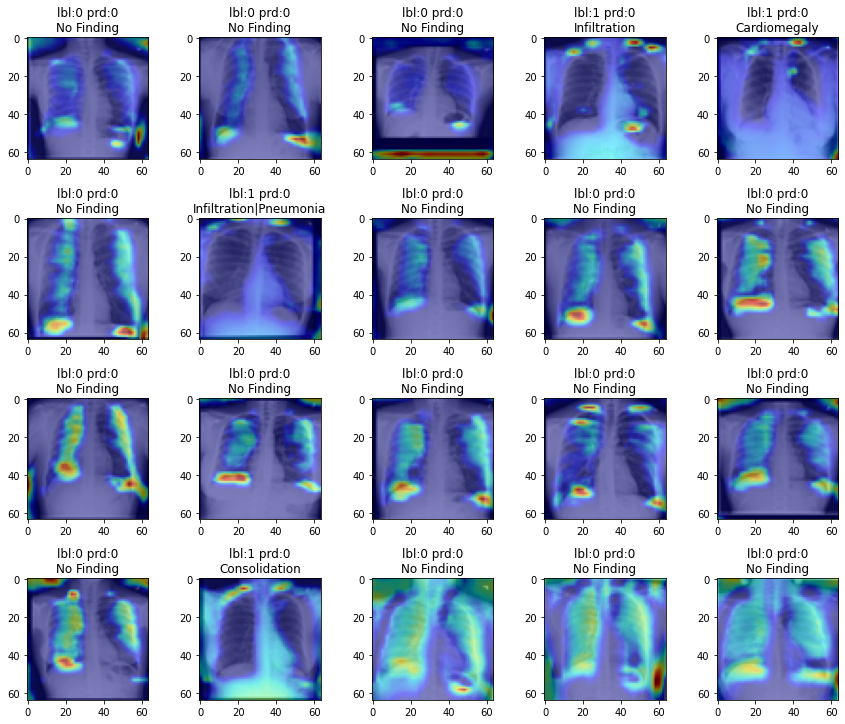

In [53]:
y_prob_test = model.predict(X_test)[:, 1]                             #予測として出力した数値
y_pred_test = np.array(y_prob_test >= 0.5).astype(int)         #予測ラベル

print('accuracy: ', accuracy_score(y_test, y_pred_test))      #accuracy: 正解率
print('precision: ', precision_score(y_test, y_pred_test))      #precision: 適合率（陽性的中率)
print('recall: ', recall_score(y_test, y_pred_test))                  #recall: 再現率（感度）
print('specificity: ', specificity_score(y_test, y_pred_test))    #specificity: 特異度
print('f1 score: ', f1_score(y_test, y_pred_test))                    #F1 score: 再現率と適合率の調和平均 2*Precision*Recall/(Precision + Recall)        

plot_confusion_table(y_test, y_pred_test)                            #confusion matrix
plot_roc_curve_auc(y_test, y_pred_test)                              #roc curve
plot_caliblation_curve(y_test, y_prob_test)                           #calibration plot

#Grad-CAM
fig = plt.figure(figsize=(12, 50))                                            

for i in range(20):
    plt.subplot(20, 5, i+1)
    grad_cam(model, i, X_test, y_test_oh)
    plt.title('lbl:' + str(y_test[y_test.index[i]]) + ' prd:' + str(y_pred_test[i]) + '\n' + df_test.loc[y_test.index[i], 'Finding Labels'])

plt.tight_layout()

## 11.NIH chest X-ray Dataset (転移学習)

転移学習は、既に学習済みのモデルを追加で学習させることで、新たなモデルを生成する方法です。

VGG16という16層からなるCNNモデルを使ってみます。 https://arxiv.org/pdf/1409.1556.pdf

ImageNetという画像データセットの120万枚の画像を1000分類するタスクで学習したパラメータが公開されているため、これを利用して追加で学習するようにしてみます。

VGG16はカラー画像に対するネットワークであるため、入力画像をコピーして3チャンネル分にして、次元のサイズをカラー画像に無理やり合わせます。

In [54]:
X_train_for_vgg = np.tile(X_train, (1,1,1,3))
X_tuning_for_vgg = np.tile(X_tuning, (1,1,1,3))
X_test_for_vgg = np.tile(X_test, (1,1,1,3))

In [55]:
print(X_train_for_vgg.shape)
print(X_tuning_for_vgg.shape)
print(X_test_for_vgg.shape)

(20000, 64, 64, 3)
(5000, 64, 64, 3)
(5805, 64, 64, 3)


下記のようにVGG16を呼び出してオプションでweightにimagenetを設定します。元々1000分類用のネットワークなのですが、including_top=Falseで最後のレイヤーは読み込まず、最後が2分類の0 or 1がsoftmax関数で出力するようにレイヤーを追加しています。元々のネットワークは学習せずに、追加したレイヤーだけ学習するように設定しています。

In [56]:
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=None,  input_shape=None)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=outputs)

for layer in base_model.layers:
   layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [57]:
vgg_model.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0  

In [58]:
#学習開始前にランダムシードを再固定。
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

In [59]:
vgg_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
history = vgg_model.fit(X_train_for_vgg, y_train_oh, 
                                     epochs=10, 
                                     validation_data=(X_tuning_for_vgg, y_tuning_oh), 
                                     batch_size=128, 
                                     shuffle=True)

Epoch 1/10
157/157 [==============================] - 22s 114ms/step - loss: 0.5820 - accuracy: 0.7138 - val_loss: 0.5761 - val_accuracy: 0.7162
Epoch 2/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5691 - accuracy: 0.7228 - val_loss: 0.5993 - val_accuracy: 0.6938
Epoch 3/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5654 - accuracy: 0.7212 - val_loss: 0.5732 - val_accuracy: 0.7166
Epoch 4/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5606 - accuracy: 0.7260 - val_loss: 0.5718 - val_accuracy: 0.7176
Epoch 5/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5581 - accuracy: 0.7271 - val_loss: 0.5735 - val_accuracy: 0.7208
Epoch 6/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5574 - accuracy: 0.7298 - val_loss: 0.5827 - val_accuracy: 0.7172
Epoch 7/10
157/157 [==============================] - 16s 103ms/step - loss: 0.5557 - accuracy: 0.7308 - val_loss: 0.5716 - val_ac

accuracy:  0.6701119724375538
precision:  0.5623306233062331
recall:  0.20677628300946688
specificity:  0.9149552395997894
f1 score:  0.30236794171220405


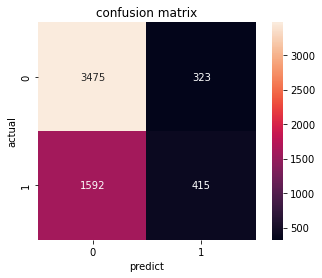

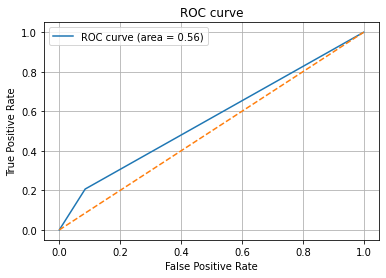

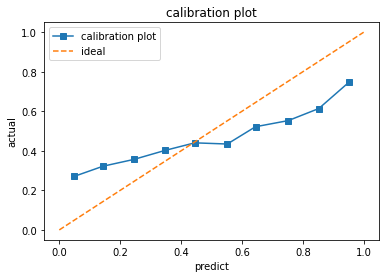

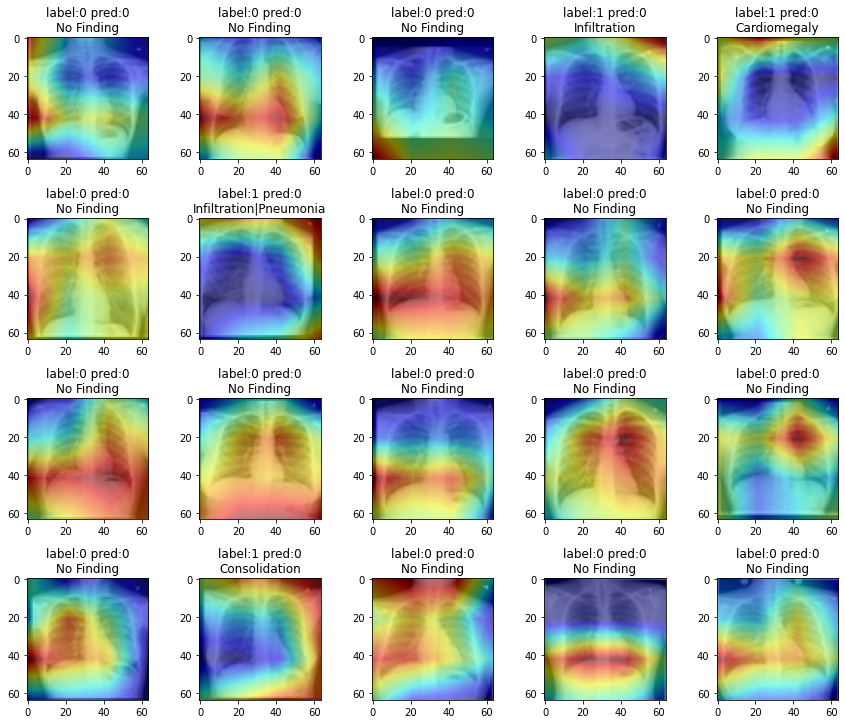

In [72]:
y_prob_test_vgg = vgg_model.predict(X_test_for_vgg)[:, 1]                             #予測として出力した数値
y_pred_test_vgg = np.array(y_prob_test_vgg >= 0.5).astype(int)         #予測ラベル

print('accuracy: ', accuracy_score(y_test, y_pred_test_vgg))      #accuracy: 正解率
print('precision: ', precision_score(y_test, y_pred_test_vgg))      #precision: 適合率（陽性的中率)
print('recall: ', recall_score(y_test, y_pred_test_vgg))                  #recall: 再現率（感度）
print('specificity: ', specificity_score(y_test, y_pred_test_vgg))    #specificity: 特異度
print('f1 score: ', f1_score(y_test, y_pred_test_vgg))                    #F1 score: 再現率と適合率の調和平均 2*Precision*Recall/(Precision + Recall)        

plot_confusion_table(y_test, y_pred_test_vgg)                            #confusion matrix
plot_roc_curve_auc(y_test, y_pred_test_vgg)                              #roc curve
plot_caliblation_curve(y_test, y_prob_test_vgg)                           #calibration plot

#Grad-CAM
fig = plt.figure(figsize=(12, 50))                                            

for i in range(20):
    plt.subplot(20, 5, i+1)
    grad_cam(vgg_model, i, X_test_for_vgg, y_test_oh)
    plt.title('label:' + str(y_test[y_test.index[i]]) + ' pred:' + str(y_pred_test_vgg[i]) + '\n' + df_test.loc[y_test.index[i], 'Finding Labels'])
    
plt.tight_layout()

## 12.発展問題

mnistのデータを対象にして、モデルの性能が上がるように試行錯誤してみることとします。画像データを使った深層学習でよく使う手法として、画像をずらしたり回転させたりして学習データの効果を増強するオーグメンテーションがあり、下ではkerasのImageDataGenerator関数を使って画像のオーグメンテーションを行っています。

下記のセルを実行し、プログラムが空いているところを埋めて、トレーニングデータで学習したモデルの性能をチューニングデータで検証し、最後にテストデータに対してaccuracy 99%、F1スコア 0.99を超えるモデルを作ってみてください。

In [ ]:
###このセルはそのまま実行してください。
%reset  #一旦インポートしたモジュールの情報や作成した変数をリセットしてメモリを空ける

#このセルを実行すると、Once deleted, variables cannot be recovered. Proceed (y/[n])? と聞かれるので、y と入力してエンターキーを押す。

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #一旦インポートしたモジュールの情報や作成した変数をリセットしてメモリを空ける, please run `%reset?` for details


In [ ]:
###このセルはそのまま実行してください。
##もう一度下記をインポートする

import pandas as pd
import numpy as np
import scipy.misc
import scipy
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.isotonic import IsotonicRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model, model_from_json, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import seaborn as sns

%matplotlib inline

#実習用に下記でランダムシードを固定する。
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

In [ ]:
###このセルはそのまま実行してください。
##データ読み込み、前処理用のセル
#mnistデータの読み込み
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

#読み込んだ後のデータの各次元のサイズを確認
print("データ読み込み後")
print('X_train_mnistの各次元のサイズ: ', X_train_mnist.shape)
print('y_train_mnistの各次元のサイズ: ', y_train_mnist.shape)
print('X_test_mnistの各次元のサイズ: ', X_test_mnist.shape)
print('y_test_mnistの各次元のサイズ: ', y_test_mnist.shape)
print()

#X_train_mnist, y_train_mnistから、scikit-learnのtrain_test_splitを使ってX_tuning_mnist、y_tuning_mnistを切り出す
X_train_mnist, X_tuning_mnist, y_train_mnist, y_tuning_mnist = train_test_split(X_train_mnist, y_train_mnist, test_size=0.2, random_state=0)

#X_train_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0],28,28,1).astype('float32')
X_train_mnist = ((X_train_mnist/255.)-0.5)*2.

#y_train_mnistをone-hot表現に変換してy_train_mnist_ohという変数に入れておく
y_train_mnist_oh = to_categorical(y_train_mnist)

#X_tuning_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_tuning_mnist = X_tuning_mnist.reshape(X_tuning_mnist.shape[0],28,28,1).astype('float32')
X_tuning_mnist = ((X_tuning_mnist/255.)-0.5)*2.

#y_tuning_mnistをone-hot表現に変換してy_tuning_mnist_ohという変数に入れておく
y_tuning_mnist_oh = to_categorical(y_tuning_mnist)

#X_test_mnistの次元を(枚数、28, 28, チャンネル数)に変換したのち、0-255のピクセル値を-1から1の値にスケーリングする
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0],28,28,1).astype('float32')
X_test_mnist = ((X_test_mnist/255.)-0.5)*2.

#y_test_mnistをone-hot表現に変換してy_test_mnist_ohという変数に入れておく
y_test_mnist_oh = to_categorical(y_test_mnist)

#データ整形後の各次元のサイズを確認
print("データ整形後")
print('X_train_mnistの各次元のサイズ: ', X_train_mnist.shape)
print('y_train_mnistの各次元のサイズ: ', y_train_mnist.shape)
print('y_train_mnist_ohの各次元のサイズ: ', y_train_mnist_oh.shape)
print()
print('X_tuning_mnistの各次元のサイズ: ', X_tuning_mnist.shape)
print('y_tuning_mnistの各次元のサイズ: ', y_tuning_mnist.shape)
print('y_tuning_mnist_ohの各次元のサイズ: ', y_tuning_mnist_oh.shape)
print()
print('X_test_mnistの各次元のサイズ: ', X_test_mnist.shape)
print('y_test_mnistの各次元のサイズ: ', y_test_mnist.shape)
print('y_test_mnist_ohの各次元のサイズ: ', y_test_mnist.shape)


データ読み込み後
X_train_mnistの各次元のサイズ:  (60000, 28, 28)
y_train_mnistの各次元のサイズ:  (60000,)
X_test_mnistの各次元のサイズ:  (10000, 28, 28)
y_test_mnistの各次元のサイズ:  (10000,)

データ整形後
X_train_mnistの各次元のサイズ:  (48000, 28, 28, 1)
y_train_mnistの各次元のサイズ:  (48000,)
y_train_mnist_ohの各次元のサイズ:  (48000, 10)

X_tuning_mnistの各次元のサイズ:  (12000, 28, 28, 1)
y_tuning_mnistの各次元のサイズ:  (12000,)
y_tuning_mnist_ohの各次元のサイズ:  (12000, 10)

X_test_mnistの各次元のサイズ:  (10000, 28, 28, 1)
y_test_mnistの各次元のサイズ:  (10000,)
y_test_mnist_ohの各次元のサイズ:  (10000,)


下のセルのepoch_num、optimizer_type、batch_size_num、rotation_range、width_shift_range、height_shift_range、zoom_rangeの値について、値を考えて代入してください。
また、「ここにニューラルネットワークを定義するスクリプトを記載します。」の部分にニューラルネットワークを定義するスクリプトを作って書き込んで、セルを実行してください。

In [ ]:
epoch_num =                              #エポック数（学習データを何周するか）を決めます。(記入例：epock_num = 10 のように決めます)
optimizer_type =                         #最適化のための手法を決めます。(記入例：optimizer_type = SGD(lr=0.01) のように決めます)
batch_size_num =                      #学習時のバッチサイズを決めます。(記入例：batch_size_num =  128 のように決めます)
rotation_range =                         #画像をランダムに回転する回転範囲を決めます。(記入例：rotation_range = 20 のように決めます)
width_shift_range =                    #ランダムに水平シフトする範囲を決めます。(記入例：width_shift_range = 0.2 のように決めます)
height_shift_range =                   #ランダムに垂直シフトする範囲を決めます。(記入例：height_shift_range = 0.2 のように決めます)
zoom_range =                             #ランダムにズームする比率を決めます。(記入例：rzoom_range = 0.2  のように決めます)

mnist_model_new = Sequential()
#
#
#
#
#ここにニューラルネットワークを定義するスクリプトを記載します。
#
#
#
#
mnist_model_new.add(Dense(units=10, activation='softmax'))

mnist_model_new.compile(loss="categorical_crossentropy", optimizer=optimizer_type, metrics=["accuracy"])
mnist_model_new.summary()

datagen = ImageDataGenerator(rotation_range=rotation_range,                           
                                                    width_shift_range=width_shift_range,              
                                                    height_shift_range=height_shift_range,             
                                                    zoom_range = zoom_range)                             

In [ ]:
#学習開始前に下記でランダムシードを再固定
tf.random.set_seed(0)
np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

下のセルを実行して学習を開始します。

In [ ]:
###このセルは、一つ前のセルのプログラムを埋めてエラーなく実行できるようになったら、その後にそのままこのセルを実行してください。
#学習開始
history = mnist_model_new.fit(datagen.flow(X_train_mnist, y_train_mnist_oh, batch_size=128), 
                                                epochs=epoch_num, 
                                                validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                                                batch_size= batch_size_num, 
                                                shuffle=True)

下記を実行してテストデータに対してaccuracyとf1 scoreを確認します。

In [ ]:
###このセルは一つ前のセルの学習が終わったら、そのまま実行してください。
y_pred_mnist = mnist_model_new.predict(X_test_mnist, batch_size=128)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist, average='macro'))

### 回答例1
ニューラルネットワークを深めにして、エポックを50に設定したケースです。


In [ ]:
epoch_num =  50                           
optimizer_type = SGD(lr=0.01)                    
batch_size_num =  128                     
rotation_range =  10                      
width_shift_range = 0.1                   
height_shift_range =  0.1                
zoom_range = 0.1                        

mnist_model_new = Sequential()
mnist_model_new.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model_new.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))

mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))

mnist_model_new.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
mnist_model_new.add(MaxPooling2D(pool_size=(2,2)))

mnist_model_new.add(Flatten())
mnist_model_new.add(Dense(units=512, activation='relu'))
mnist_model_new.add(Dense(units=10, activation='softmax'))

mnist_model_new.compile(loss="categorical_crossentropy", optimizer=optimizer_type, metrics=["accuracy"])
mnist_model_new.summary()

datagen = ImageDataGenerator(rotation_range=rotation_range,                           
                                                    width_shift_range=width_shift_range,              
                                                    height_shift_range=height_shift_range,             
                                                    zoom_range = zoom_range)                             

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
#学習開始
history = mnist_model_new.fit(datagen.flow(X_train_mnist, y_train_mnist_oh, batch_size=batch_size_num), 
                                                epochs=epoch_num, 
                                                validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                                                batch_size= batch_size_num, 
                                                shuffle=True)

Epoch 1/50
375/375 [==============================] - 14s 37ms/step - loss: 2.2865 - accuracy: 0.2255 - val_loss: 2.2401 - val_accuracy: 0.3466
Epoch 2/50
375/375 [==============================] - 13s 35ms/step - loss: 1.6367 - accuracy: 0.5132 - val_loss: 0.4853 - val_accuracy: 0.8628
Epoch 3/50
375/375 [==============================] - 13s 36ms/step - loss: 0.4465 - accuracy: 0.8630 - val_loss: 0.1542 - val_accuracy: 0.9570
Epoch 4/50
375/375 [==============================] - 13s 36ms/step - loss: 0.2434 - accuracy: 0.9253 - val_loss: 0.1137 - val_accuracy: 0.9649
Epoch 5/50
375/375 [==============================] - 13s 36ms/step - loss: 0.1845 - accuracy: 0.9439 - val_loss: 0.0929 - val_accuracy: 0.9722
Epoch 6/50
375/375 [==============================] - 13s 36ms/step - loss: 0.1502 - accuracy: 0.9532 - val_loss: 0.1155 - val_accuracy: 0.9632
Epoch 7/50
375/375 [==============================] - 13s 36ms/step - loss: 0.1334 - accuracy: 0.9584 - val_loss: 0.0753 - val_accuracy:

In [ ]:
y_pred_mnist = mnist_model_new.predict(X_test_mnist, batch_size=128)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist, average='macro'))

accuracy: 0.9918
f1 score: 0.9917339476130588


### 回答例2
最適化の手法をAdamという手法でやってみた場合です。ネットワークの構造や画像の回転やずらす範囲なども回答例1とは変えてみた例です。


In [ ]:
epoch_num =  10                           
optimizer_type = Adam(lr=0.001)                    
batch_size_num =  128                     
rotation_range =  20                      
width_shift_range = 0.15                   
height_shift_range =  0.15                
zoom_range = 0.15                        

mnist_model_new = Sequential()

mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))

mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))

mnist_model_new.add(Flatten())
mnist_model_new.add(Dense(units=512, activation='relu'))
mnist_model_new.add(Dense(units=10, activation='softmax'))

mnist_model_new.compile(loss="categorical_crossentropy", optimizer=optimizer_type, metrics=["accuracy"])
mnist_model_new.summary()

datagen = ImageDataGenerator(rotation_range=rotation_range,                           
                                                    width_shift_range=width_shift_range,              
                                                    height_shift_range=height_shift_range,             
                                                    zoom_range = zoom_range)                             

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 128)       

In [ ]:
#学習開始
history = mnist_model_new.fit(datagen.flow(X_train_mnist, y_train_mnist_oh, batch_size=batch_size_num), 
                                                epochs=epoch_num, 
                                                validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                                                batch_size= batch_size_num, 
                                                shuffle=True)

Epoch 1/10
375/375 [==============================] - 16s 41ms/step - loss: 0.4507 - accuracy: 0.8509 - val_loss: 0.0658 - val_accuracy: 0.9797
Epoch 2/10
375/375 [==============================] - 16s 42ms/step - loss: 0.1201 - accuracy: 0.9636 - val_loss: 0.0502 - val_accuracy: 0.9867
Epoch 3/10
375/375 [==============================] - 16s 42ms/step - loss: 0.0890 - accuracy: 0.9736 - val_loss: 0.0447 - val_accuracy: 0.9867
Epoch 4/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0747 - accuracy: 0.9778 - val_loss: 0.0329 - val_accuracy: 0.9903
Epoch 5/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 6/10
375/375 [==============================] - 15s 41ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 7/10
375/375 [==============================] - 16s 41ms/step - loss: 0.0550 - accuracy: 0.9837 - val_loss: 0.0266 - val_accuracy:

In [ ]:
y_pred_mnist = mnist_model_new.predict(X_test_mnist, batch_size=128)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist, average='macro'))

accuracy: 0.9911
f1 score: 0.9910409004540641


### 回答例3
batch normalizationという手法でレイヤーレベルでデータの正規化を行うと学習効率がよくなり過学習も防げることが知られています。
https://keras.io/ja/layers/normalization/

In [ ]:
epoch_num =  10                           
optimizer_type = SGD(lr=0.01)                    
batch_size_num =  128                     
rotation_range =  10                      
width_shift_range = 0.1                   
height_shift_range =  0.1                
zoom_range = 0.1                        

mnist_model_new = Sequential()
mnist_model_new.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
mnist_model_new.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))
mnist_model_new.add(BatchNormalization())

mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mnist_model_new.add(MaxPooling2D(pool_size=(2, 2)))
mnist_model_new.add(BatchNormalization())

mnist_model_new.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
mnist_model_new.add(MaxPooling2D(pool_size=(2,2)))

mnist_model_new.add(Flatten())
mnist_model_new.add(BatchNormalization())
mnist_model_new.add(Dense(units=512, activation='relu'))
mnist_model_new.add(Dense(units=10, activation='softmax'))

mnist_model_new.compile(loss="categorical_crossentropy", optimizer=optimizer_type, metrics=["accuracy"])
mnist_model_new.summary()

datagen = ImageDataGenerator(rotation_range=rotation_range,                           
                                                    width_shift_range=width_shift_range,              
                                                    height_shift_range=height_shift_range,             
                                                    zoom_range = zoom_range)                             

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)        

In [ ]:
#学習開始
history = mnist_model_new.fit(datagen.flow(X_train_mnist, y_train_mnist_oh, batch_size=batch_size_num), 
                                                epochs=epoch_num, 
                                                validation_data=(X_tuning_mnist, y_tuning_mnist_oh), 
                                                batch_size= batch_size_num, 
                                                shuffle=True)

Epoch 1/10
375/375 [==============================] - 13s 34ms/step - loss: 0.3601 - accuracy: 0.9057 - val_loss: 2.2066 - val_accuracy: 0.2026
Epoch 2/10
375/375 [==============================] - 12s 33ms/step - loss: 0.1249 - accuracy: 0.9666 - val_loss: 0.0620 - val_accuracy: 0.9842
Epoch 3/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0886 - accuracy: 0.9754 - val_loss: 0.0533 - val_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0742 - accuracy: 0.9792 - val_loss: 0.0431 - val_accuracy: 0.9880
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0614 - accuracy: 0.9829 - val_loss: 0.0351 - val_accuracy: 0.9896
Epoch 6/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0550 - accuracy: 0.9842 - val_loss: 0.0399 - val_accuracy: 0.9890
Epoch 7/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.0303 - val_accuracy:

In [ ]:
y_pred_mnist = mnist_model_new.predict(X_test_mnist, batch_size=128)
y_pred_mnist = np.argmax(y_pred_mnist, axis=1)
print('accuracy:', accuracy_score(y_test_mnist, y_pred_mnist))    
print('f1 score:',f1_score(y_test_mnist, y_pred_mnist, average='macro'))

accuracy: 0.9936
f1 score: 0.9935800169277369
